In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

def gellipse(mu, cov, n=100, *args, **kwargs):
    """
    Contour plot of 2D Multivariate Gaussian distribution.

    gellipse(mu, cov, n) plots ellipse given by mean vector MU and
    covariance matrix COV. Ellipse is plotted using N (default is 100)
    points. Additional parameters can specify various line types and
    properties. See description of matplotlib.pyplot.plot for more details.
    """
    mu = mu.copy()
    if mu.shape == (2,):
        mu.shape = (2, 1)
    if mu.shape != (2, 1) or cov.shape != (2, 2):
        raise RuntimeError('mu must be a two element vector and cov must be 2 x 2 matrix')

    d, v = np.linalg.eigh(4 * cov)
    d = np.diag(d)
    t = np.linspace(0, 2 * np.pi, n)
    x = v @ np.sign(d) @ np.sqrt(np.abs(d)) @ np.array([np.cos(t), np.sin(t)]) + mu
    return plt.plot(x[0], x[1], *args, **kwargs)

For 2D gaussian distribution

$p\left(\begin{bmatrix} x \\ y \end{bmatrix}\right)=\mathcal{N}\left(\begin{bmatrix} x \\ y \end{bmatrix} \middle| \begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}, \begin{bmatrix} \Sigma_{xx} & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_{xx} \end{bmatrix}\right)$

the conditional probability

$p(x | y) = \mathcal{N}\left(x \middle| \mu_{x|y}, \Lambda_{xx}^{-1}\right)$

where

$\mu_{x|y} = \mu_{x} - \Lambda_{xx}^{-1} \Lambda_{xy}(y-\mu_y)$

and

${\begin{bmatrix} \Sigma_{xx}  & \Sigma_{xy}  \\ \Sigma_{yx} &  \Sigma_{xx}  \end{bmatrix}}^{-1}
={\begin{bmatrix} \Lambda_{xx} & \Lambda_{xy} \\ \Lambda_{yx} & \Lambda_{xx} \end{bmatrix}}$

Mean: [1.65561317 1.17423437]
Cov:
 [[16.65993317 12.20070108]
 [12.20070108 10.05701194]]


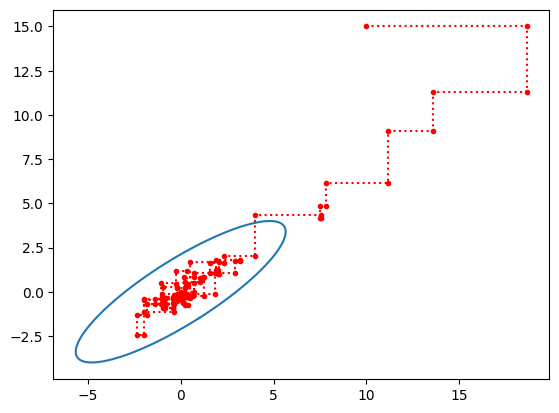

In [3]:
mu = np.array([0, 0])
Sigma = np.array([[2.0, 1.2], 
                  [1.2, 1.0]])

Lambda=np.linalg.inv(Sigma)

x=[10]
y=[15]

for i in range(50):
 mm = mu[0]-Lambda[0,1]/Lambda[0,0]*(y[-1]-mu[1])
 ss = 1.0/np.sqrt(Lambda[0,0])
 x.append(np.random.normal(mm, ss)) # sample new x
 y.append(y[-1])                    # keep the same y

 mm = mu[1]-Lambda[1,0]/Lambda[1,1]*(x[-1]-mu[0])
 ss = 1/np.sqrt(Lambda[1,1])
 y.append(np.random.normal(mm, ss))
 x.append(x[-1])

plt.plot(x,y,'r:.')
gellipse(mu, 4*Sigma)

print("Mean:", np.mean(np.c_[x, y], axis=0))
print("Cov:\n", np.cov(np.c_[x, y].T))
